<a href="https://colab.research.google.com/github/akshay963186/MACHINE-LEARNING-AND-DEEP-LEARNING-PROJECTS/blob/main/CNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [4]:
!pip3 install tensorflow numpy matplotlib keras

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random
import tensorflow as tf
from tensorflow.keras import layers, models
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,auc,precision_recall_curve,f1_score
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [18]:
dis=os.listdir('/content/dogs_vs_cats')

In [19]:
dis

['test', 'train']

In [7]:
lis=random.sample(os.listdir('/content/train/dogs'),10)

In [16]:
lis

['dog.6158.jpg',
 'dog.4962.jpg',
 'dog.6243.jpg',
 'dog.11167.jpg',
 'dog.2476.jpg',
 'dog.4916.jpg',
 'dog.5809.jpg',
 'dog.12042.jpg',
 'dog.2570.jpg',
 'dog.4276.jpg']

In [8]:
image_path=os.path.join("/content/train/dogs/",'dog.7355.jpg')

In [9]:
image=Image.open(image_path)

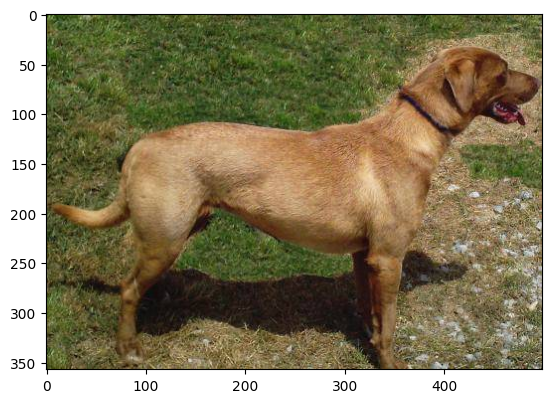

In [10]:
plt.imshow(image)

In [11]:
def dog_img(lis,path):
  for i in dis:
    image_path=os.path.join(path,i)
    image=Image.open(image_path)
    plt.imshow(image)
    plt.show()

In [12]:
cat_image=os.listdir('/content/train/cats')
dog_image=os.listdir('/content/train/dogs')
classes_animals=['cats','dogs']
count=[len(cat_image),len(dog_image)]
print(count)

[10000, 10000]


In [13]:
path_dir='/content/dogs_vs_cats'

In [15]:
os.walk(path_dir)



<generator object _walk at 0x7e6e0bdec820>

In [20]:
for a,b,c in os.walk(path_dir):
  print(a,b,c)

/content/dogs_vs_cats ['test', 'train'] []
/content/dogs_vs_cats/test ['cats', 'dogs'] []
/content/dogs_vs_cats/test/cats [] ['cat.9108.jpg', 'cat.7096.jpg', 'cat.3622.jpg', 'cat.8799.jpg', 'cat.4746.jpg', 'cat.6420.jpg', 'cat.2938.jpg', 'cat.8101.jpg', 'cat.7268.jpg', 'cat.3078.jpg', 'cat.11995.jpg', 'cat.7158.jpg', 'cat.663.jpg', 'cat.6396.jpg', 'cat.3793.jpg', 'cat.6782.jpg', 'cat.9432.jpg', 'cat.8203.jpg', 'cat.462.jpg', 'cat.3998.jpg', 'cat.3267.jpg', 'cat.2213.jpg', 'cat.6184.jpg', 'cat.9705.jpg', 'cat.4009.jpg', 'cat.8372.jpg', 'cat.8868.jpg', 'cat.99.jpg', 'cat.1557.jpg', 'cat.2569.jpg', 'cat.9794.jpg', 'cat.6075.jpg', 'cat.6343.jpg', 'cat.7749.jpg', 'cat.2656.jpg', 'cat.9349.jpg', 'cat.3249.jpg', 'cat.388.jpg', 'cat.5876.jpg', 'cat.5009.jpg', 'cat.10317.jpg', 'cat.7743.jpg', 'cat.5700.jpg', 'cat.11141.jpg', 'cat.832.jpg', 'cat.2744.jpg', 'cat.4141.jpg', 'cat.12498.jpg', 'cat.1762.jpg', 'cat.11421.jpg', 'cat.7691.jpg', 'cat.9259.jpg', 'cat.11792.jpg', 'cat.4469.jpg', 'cat.4380.

In [21]:
import os
import cv2
import imghdr

img_exist=['png','jpg','jpeg']
data_dir='/content/dogs_vs_cats'
for root,dires,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)
    try:
      file_type=imghdr.what(file_path)
      if file_type not in img_exist:
        os.remove(file_path)
      else:
        img=cv2.imread(file_path)

    except Exception as e:
      print(f,'issue with files{ file_path}.Error:{e}')
      os.remove(file_path)





In [22]:
import numpy as np
from PIL import Image

def image_to_array(image_path):
  try:
    with Image.open(image_path) as img:
      img_array=np.array(img)
      return img_array
  except IOError:
    print("cannot convert image to array")
    return None

array([[[ 26,  30,  39],
        [ 24,  28,  37],
        [ 19,  23,  32],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [125, 157, 154]],

       [[ 29,  33,  42],
        [ 29,  33,  42],
        [ 26,  30,  39],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [124, 156, 153]],

       [[ 30,  34,  43],
        [ 34,  38,  47],
        [ 35,  39,  48],
        ...,
        [127, 159, 156],
        [126, 158, 155],
        [124, 156, 153]],

       ...,

       [[165, 151, 114],
        [163, 149, 110],
        [156, 142, 103],
        ...,
        [175, 170,   6],
        [172, 166,   6],
        [166, 160,   2]],

       [[160, 146, 111],
        [159, 145, 108],
        [153, 139, 102],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[154, 140, 105],
        [154, 140, 103],
        [150, 136,  99],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]]], dtype=uint8)
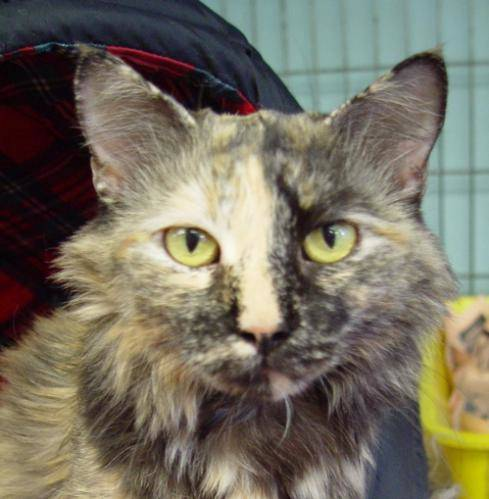

In [23]:
image_to_array('/content/dogs_vs_cats/test/cats/cat.10.jpg')

In [24]:
image='/content/dogs_vs_cats/test/cats/cat.10.jpg'
import cv2
img=cv2.imread(image)
if img is not None:
  print(img)
  print(img.shape)
else:
  print('error')


[[[ 39  30  26]
  [ 37  28  24]
  [ 32  23  19]
  ...
  [155 158 126]
  [154 157 125]
  [154 157 125]]

 [[ 42  33  29]
  [ 42  33  29]
  [ 39  30  26]
  ...
  [155 158 126]
  [154 157 125]
  [153 156 124]]

 [[ 43  34  30]
  [ 47  38  34]
  [ 48  39  35]
  ...
  [156 159 127]
  [155 158 126]
  [153 156 124]]

 ...

 [[114 151 165]
  [110 149 163]
  [103 142 156]
  ...
  [  6 170 175]
  [  6 166 172]
  [  2 160 166]]

 [[111 146 160]
  [108 145 159]
  [102 139 153]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]

 [[105 140 154]
  [103 140 154]
  [ 99 136 150]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]]
(499, 489, 3)


In [25]:
import numpy as np
from PIL import Image

img_pill=Image.open(image)
img_array=np.array(img_pill)
print(img_array)
print(img_array.shape)

[[[ 26  30  39]
  [ 24  28  37]
  [ 19  23  32]
  ...
  [126 158 155]
  [125 157 154]
  [125 157 154]]

 [[ 29  33  42]
  [ 29  33  42]
  [ 26  30  39]
  ...
  [126 158 155]
  [125 157 154]
  [124 156 153]]

 [[ 30  34  43]
  [ 34  38  47]
  [ 35  39  48]
  ...
  [127 159 156]
  [126 158 155]
  [124 156 153]]

 ...

 [[165 151 114]
  [163 149 110]
  [156 142 103]
  ...
  [175 170   6]
  [172 166   6]
  [166 160   2]]

 [[160 146 111]
  [159 145 108]
  [153 139 102]
  ...
  [175 171   2]
  [172 167   3]
  [166 161   0]]

 [[154 140 105]
  [154 140 103]
  [150 136  99]
  ...
  [175 171   2]
  [172 167   3]
  [166 161   0]]]
(499, 489, 3)


In [26]:
!pip3 install opencv-python

In [27]:
base_dir='/content/dogs_vs_cats/train'

train_data_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [28]:
train_generator=train_data_gen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    subset='training')
validation_generator =train_data_gen.flow_from_directory(
     base_dir,
     target_size=(150,150),
     batch_size=20,
     class_mode='binary',
     subset='validation')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [29]:
train_class_labels=train_generator.class_indices
print("TRAINING CLAS LABEL",train_class_labels)

validation_class_labels=validation_generator.class_indices
print("VALIDATION CLAS LABEL",validation_class_labels)

TRAINING CLAS LABEL {'cats': 0, 'dogs': 1}
VALIDATION CLAS LABEL {'cats': 0, 'dogs': 1}


In [30]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
]) # Remove the extra [] here

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
batch=20
train_steps=np.ceil(train_generator.samples/batch)
validation_steps=np.ceil(validation_generator.samples/batch)
print(train_steps)
print(validation_steps)

800.0
200.0


In [34]:
model.fit(train_generator,steps_per_epoch=800,epochs=2,validation_data=validation_generator,validation_steps=200)

Epoch 1/2
800/800 [==============================] - 42s 46ms/step - loss: 0.6507 - accuracy: 0.6339 - val_loss: 0.5635 - val_accuracy: 0.7030
Epoch 2/2
800/800 [==============================] - 38s 48ms/step - loss: 0.5101 - accuracy: 0.7470 - val_loss: 0.5090 - val_accuracy: 0.7560


In [35]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_dir='/content/dogs_vs_cats/test'
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [36]:
step=np.ceil(test_generator.samples/test_generator.batch_size)

In [37]:
test_generator.reset()
true_classes=test_generator.classes
probablities=model.predict(test_generator,steps=step)
predicted_classes=(probablities>0.5).astype(int).squeeze()
class_labels=list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 9s 35ms/step


array([0, 0, 1, ..., 0, 1, 0])

In [38]:
def make_prediction(image_path):
  imag=load_img(image_path,target_size=(150,150))
  imag=img_to_array(imag)
  imag=np.expand_dims(imag,axis=0)
  imag=imag/255.0
  prediction=model.predict(imag)
  print("prediction",prediction)

In [41]:
for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  filters,bias=model.layers[i].get_weights()
  print("layer number",i,model.layers[i].name,filters.shape)


layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)


In [42]:
filters,bias=model.layers[0].get_weights()

In [43]:
filters

array([[[[-1.29486710e-01, -1.00992687e-01, -1.08140185e-01,
           1.31640166e-01, -7.78615698e-02,  8.07662215e-03,
          -7.97735453e-02, -1.43627763e-01,  6.67878687e-02,
           2.90320478e-02, -2.96662785e-02, -8.42974186e-02,
           1.96372047e-02,  1.69425942e-02,  9.81930271e-03,
          -7.71926576e-03, -2.03402303e-02, -8.20250064e-02,
           1.07052915e-01, -1.04688630e-01,  1.02732390e-01,
           1.33207375e-02, -1.40820593e-01,  6.93528727e-02,
           1.39712781e-01, -1.14862084e-01,  4.76857461e-02,
           4.34182249e-02, -1.42503843e-01, -1.10207960e-01,
          -9.54051539e-02, -1.15158506e-01],
         [-1.46400213e-01, -5.60990088e-02,  4.61621545e-02,
          -3.63741852e-02,  6.77517578e-02, -7.19059631e-02,
          -6.55662492e-02,  9.59263518e-02,  2.01429538e-02,
           1.36117533e-01, -1.49404839e-01, -4.33030538e-02,
          -1.40739620e-01,  9.05383378e-02,  4.67773266e-02,
          -5.30745201e-02,  7.01715574e-

In [44]:
bias

array([-0.01590154, -0.01911434, -0.02975298,  0.00567288, -0.0569006 ,
       -0.01334616, -0.02074345, -0.00513355,  0.06014681, -0.01837545,
       -0.01442448,  0.03987529,  0.01878447, -0.06457879, -0.03319812,
        0.01096212, -0.01193661, -0.00801438, -0.00284424, -0.00940253,
       -0.02031018, -0.05786056, -0.00474597, -0.08118928, -0.02454055,
       -0.02313942, -0.04532552, -0.03723171,  0.00551745, -0.0250455 ,
        0.00675862,  0.00846052], dtype=float32)

In [45]:
filters.shape

(3, 3, 3, 32)